# In this notebook there will be several classification models with Iris dataset


In [ ]:
# Import necessary libs
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, RocCurveDisplay, auc, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

## LogisticRegression (binary-class)

In [ ]:
# Defining X and y
X = df[["petal width (cm)"]].values
y = (iris.target_names[iris.target] == 'setosa')

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Splitting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred[:5]

array([False,  True, False, False, False])

In [ ]:
log_report = classification_report(y_test, y_pred)

In [ ]:
print("Binary Classification Report:\n", log_report)

Binary Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        23
        True       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Softmax Regression (multi-class)

In [ ]:
# Defining X and y
X = df[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
y_pred = softmax_reg.predict(X_test)

In [ ]:
soft_report = classification_report(y_test, y_pred)

In [ ]:
print("Multi-class Classification Report:\n", soft_report)

Multi-class Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Performance Evaulating

## Confussion metrix

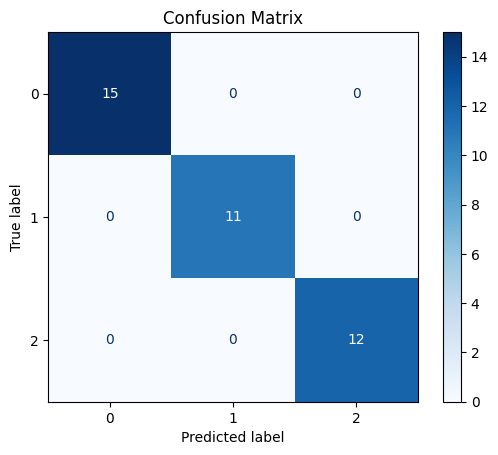

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=softmax_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Precision/Recall Trade-off

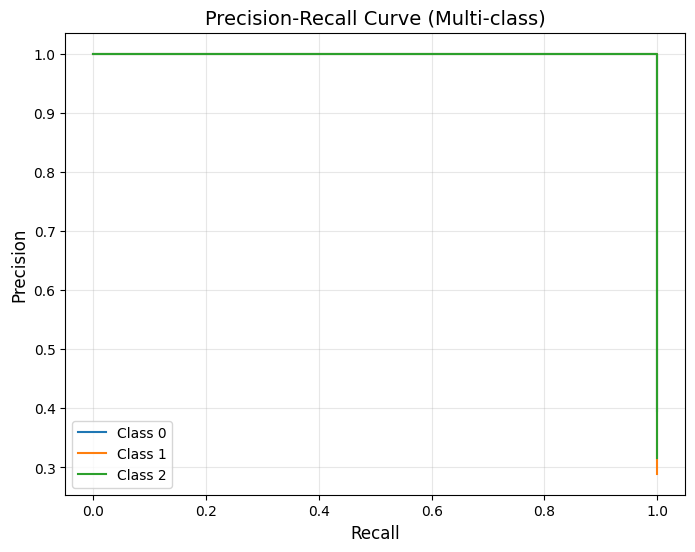

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Calculate precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()
for i in range(3): # Iterate over the 3 classes
    y_probs_class = softmax_reg.predict_proba(X_test)[:, i]
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_probs_class)

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(recall[i], precision[i], label="Class {}".format(i))
plt.title("Precision-Recall Curve (Multi-class)", fontsize=14)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

## ROC

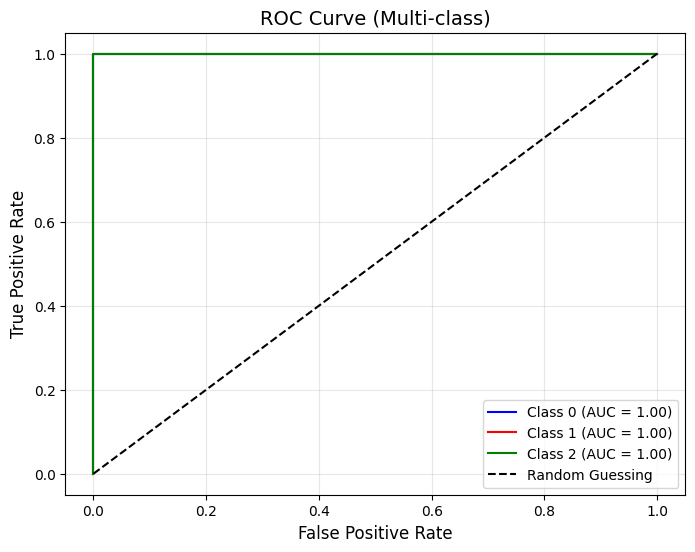

In [ ]:
# Get predicted probabilities for each class
y_probs = softmax_reg.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3): # Iterate over the 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label="Class {} (AUC = {:.2f})".format(i, roc_auc[i]), color=['blue', 'red', 'green'][i])
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title("ROC Curve (Multi-class)", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()